<a href="https://colab.research.google.com/github/Gaayathri05/CodeAlpha_Task/blob/main/Copy_of_amazon_web_proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Upload & Exploration**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
from google.colab import files
uploaded = files.upload()
import pandas as pd
df = pd.read_csv("/content/Reviews.csv",nrows=5000)
# change filename if needed
df.head()
df.info()
df.describe()


Saving Reviews.csv to Reviews.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      5000 non-null   int64 
 1   ProductId               5000 non-null   object
 2   UserId                  5000 non-null   object
 3   ProfileName             5000 non-null   object
 4   HelpfulnessNumerator    5000 non-null   int64 
 5   HelpfulnessDenominator  5000 non-null   int64 
 6   Score                   5000 non-null   int64 
 7   Time                    5000 non-null   int64 
 8   Summary                 5000 non-null   object
 9   Text                    5000 non-null   object
dtypes: int64(5), object(5)
memory usage: 390.8+ KB


,Id,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time
count,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,2500.500000,1.580200,2.067200,4.150400,1.294930e+09
std,1443.520003,5.584533,6.288672,1.326549,4.802063e+07
min,1.000000,0.000000,0.000000,1.000000,9.617184e+08
25%,1250.750000,0.000000,0.000000,4.000000,1.271376e+09
50%,2500.500000,0.000000,1.000000,5.000000,1.309219e+09
75%,3750.250000,2.000000,2.000000,5.000000,1.330301e+09
max,5000.000000,187.000000,216.000000,5.000000,1.351210e+09


**Clean data**

In [ ]:
df = df.dropna(subset=["Text"])  # Remove reviews with no text
df = df.drop_duplicates()


**Exploratory Data Analysis**


In [ ]:
df['TextLength'] = df['Text'].apply(len)
print(df['Score'].value_counts())  # Review count by rating
df.groupby('Score')['TextLength'].mean()  # Average length by score


Score
5    3134
4     712
1     469
3     395
2     290
Name: count, dtype: int64


,TextLength
Score,
1,478.089552
2,483.582759
3,463.435443
4,454.056180
5,374.793874


**Visualizations**

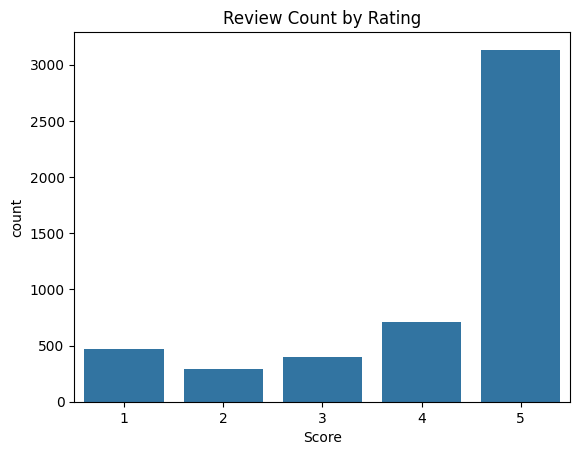

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Score', data=df)
plt.title("Review Count by Rating")
plt.show()


**Sentiment Analysis**

In [ ]:
from textblob import TextBlob

def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return "Positive"
    elif analysis.sentiment.polarity == 0:
        return "Neutral"
    else:
        return "Negative"

df['Sentiment'] = df['Text'].apply(get_sentiment)
df['Sentiment'].value_counts()


,count
Sentiment,
Positive,4416
Negative,504
Neutral,80


**Word Cloud**

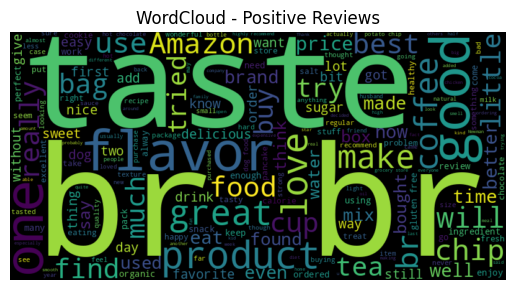

In [ ]:
from wordcloud import WordCloud

text = " ".join(review for review in df[df['Sentiment'] == 'Positive']['Text'])
wordcloud = WordCloud(width=800, height=400).generate(text)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("WordCloud - Positive Reviews")
plt.show()
